<a href="https://colab.research.google.com/github/Kristiee/Python/blob/master/Dolphin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Display the version of OpenCV 
print("OpenCV Version:",cv2.__version__)

OpenCV Version: 4.1.2


In [97]:
!wget -q -O dolphin.jpg 'https://cdn.pixabay.com/photo/2017/08/29/01/13/dolphin-2691864_960_720.jpg'
# Load an image using 'imread' specifying image file to show


In [98]:
image = cv2.imread("dolphin.jpg")

In [99]:
cv2.imwrite("dolphins.jpg", image) # returns True if image was saved

True

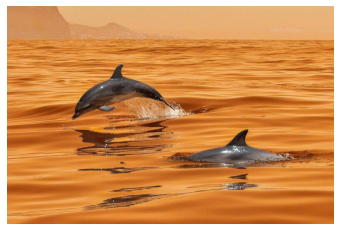

In [100]:
plt.imshow(image)
plt.axis("off")
plt.show()

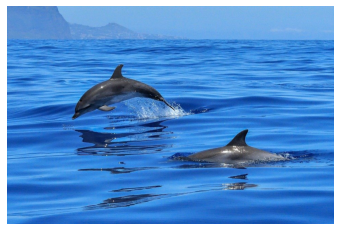

In [101]:
# use cv2.cvtColor to convert images between color spaces
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.axis('off')
plt.show()

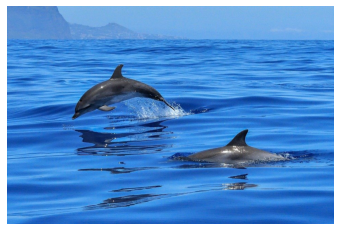

In [102]:
#can also use numpy to reverse the order of the last dimension.
rgb_image = image[..., ::-1]
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

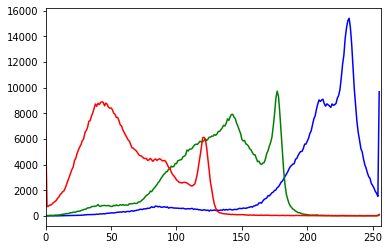

In [103]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

From the histogram above, we can see that there are many pixels that have high values of blue, while there aren't as many pixels with high reds and greens. This makes sense because the image here is dominated by the sea and the sky, both of which are blue.

You can use cv2.inRange to get the pixels that lie on a given range of intensities. Filtering colors is easier with images in HSV format, in which the three values in a pixel represent hue, saturation and value.

The code below returns all the pixels that are brightly blue, which should filter the dophins out and leave the sea and the sky behind.

In [104]:
# hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# lower_blue = np.array([60,90,150])
# upper_blue = np.array([100,235,255])
# only_sea = cv2.inRange(hsv_image, lower_blue, upper_blue)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_blue = np.array([103,93,60])
upper_blue = np.array([128,255,255])
only_sea = cv2.inRange(hsv_image, lower_blue, upper_blue)

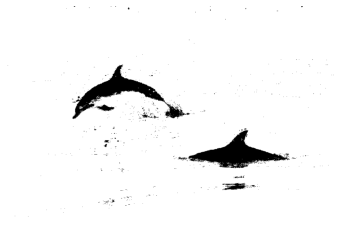

In [105]:
plt.imshow(only_sea, cmap="gray")
plt.axis("off")
plt.show()

Masks are binary images whose pixels can be either maximum (255) or zero. They are used to show the pixels that satisfy a cerain condition. For example, the mask above shows which pixels lie within the given color range. The white pixels are the ones that lie within the color range, and the black ones are the ones that don't.

Images can be masked using the bitwise-and operation, implemented in cv2.bitwise_and. This returns an image with all the pixels that have 0 as their mask value set to black. Running bitwise and on the dolphon image using the mask computed above returns a new image with only the sky and sea in it.

In [106]:
sky_and_sea_image = cv2.bitwise_and(rgb_image, rgb_image, mask=only_sea)


(-0.5, 959.5, 639.5, -0.5)

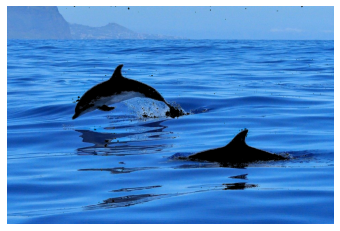

In [107]:
plt.imshow(sky_and_sea_image)
plt.axis("off")

In [108]:
only_dolphins = cv2.bitwise_and(rgb_image, rgb_image, mask=255-only_sea)


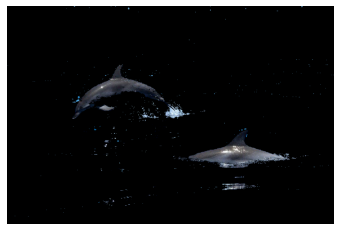

In [109]:
plt.imshow(only_dolphins)
plt.axis("off")
plt.show()

In [110]:
sea_sky_fraction = (only_sea.sum() * 100)/(only_sea.size * 255)
print ("Fraction of sea and sky in the image is {:.2f}%.".format(sea_sky_fraction))


Fraction of sea and sky in the image is 95.67%.
